<a href="https://colab.research.google.com/github/CesarAF10/Simulaci-n-I/blob/main/Kolmogorov_Smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estadístico de KS: 0.16900000000000004
Valor p: 0.42600127332744464
No se rechaza la hipótesis nula: los datos siguen una distribución uniforme.


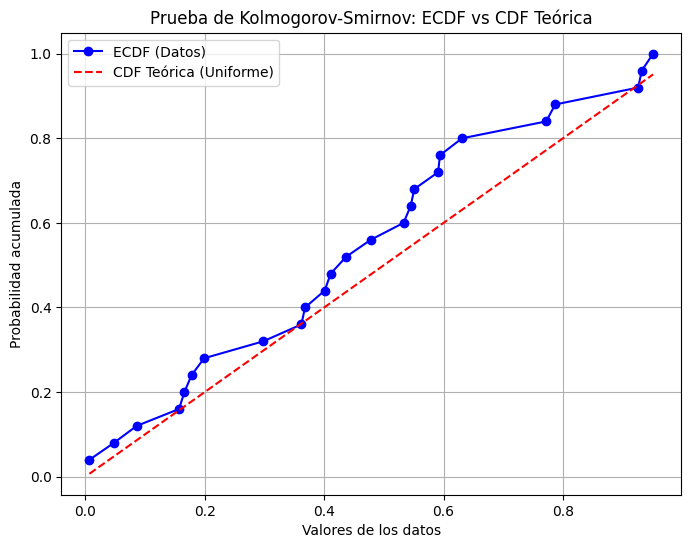

In [2]:
import numpy as np
from scipy.stats import kstest, uniform
import matplotlib.pyplot as plt
# Prueba de Kolmogorov-Smirnov

# Datos de la tabla
data = np.array([
    [0.048, 0.591, 0.478, 0.166, 0.932],
    [0.926, 0.007, 0.551, 0.362, 0.533],
    [0.368, 0.437, 0.178, 0.411, 0.545],
    [0.787, 0.594, 0.086, 0.951, 0.772],
    [0.298, 0.199, 0.157, 0.401, 0.631]
])

# Aplanar la matriz para obtener una lista unidimensional
data_flat = data.flatten()

# Ordenar los datos para la ECDF
data_sorted = np.sort(data_flat)

# Calcular la ECDF
ecdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Calcular la CDF teórica (uniforme)
cdf_theoretical = uniform.cdf(data_sorted)

# Realizar la prueba de Kolmogorov-Smirnov
result = kstest(data_flat, 'uniform')

# Mostrar los resultados
print(f"Estadístico de KS: {result.statistic}")
print(f"Valor p: {result.pvalue}")

# Interpretación del resultado
if result.pvalue > 0.05:
    print("No se rechaza la hipótesis nula: los datos siguen una distribución uniforme.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución uniforme.")

# Graficar la ECDF y la CDF teórica
plt.figure(figsize=(8, 6))
plt.plot(data_sorted, ecdf, label='ECDF (Datos)', marker='o', linestyle='-', color='blue')
plt.plot(data_sorted, cdf_theoretical, label='CDF Teórica (Uniforme)', linestyle='--', color='red')
plt.title('Prueba de Kolmogorov-Smirnov: ECDF vs CDF Teórica')
plt.xlabel('Valores de los datos')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()